# Econ 412 Project 2
## Leonardo Livio Fancello, Korntawat Yodkhan, Stephen Lin and Hayden Johnson

## Introduction

The purpose of this project is to analyze two different time series. The first set of data is the historical price series of Gold, and the second one is a correlated dataset, namely the adjusted closing prices of Franco-Nevada Corporation, a gold-focused royalty, mining and streaming company. Our initial hypothesis is to study whether gold will help predict Franco-Nevada as gold is a major player in the mining industry. We downloaded the two daily time series from Yahoo Finance, covering the period from January 1, 2008, to March 1, 2023. Subsequently, we resampled the data to a monthly timeframe.

Our initial analysis will focus on studying the features of the data, such as the ACF and PACF, to understand the correlation and lagged relationships within the time series. Following that, we will proceed to fit an ARIMA model and conduct a 12-period ahead forecast.

To assess the performance of our ARIMA model, we will compare it with alternative forecasting methods, including auto ARIMA, ETS, and Holt-Winters, based on the MAPE metric.

Additionally, we will employ a VAR model to capture the interdependencies between the Gold prices and Franco-Nevada Corporation's adjusted closing prices. Using the VAR model, we will forecast the series 12 steps ahead.

In [ ]:
import pandas as pd
import numpy as np
import itertools

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use('seaborn-white')
%matplotlib inline

#statistics libraries
from statsmodels.tsa.stattools import acf

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import recursive_olsresiduals
import scipy
from scipy.stats import anderson
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
#from nimbusml.timeseries import SsaForecaster
from statsmodels.tsa.statespace.tools import diff as diff
#import pmdarima as pm
from statsmodels.tsa.api import VAR
#from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
import pmdarima as pm
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

import yfinance as yf

## Results and Codes

In [ ]:
stock_list = ['GC=F','FNV']
gold = yf.download('GC=F', start='2008-01-01', end='2023-03-01', interval='1d')['Close'].ffill()
mine = yf.download('FNV', start='2008-01-01', end='2023-03-01', interval='1d')['Close'].ffill()
gold = pd.DataFrame(gold)
mine = pd.DataFrame(mine)
gold = gold.resample('M').last()
mine = mine.resample('M').last()
gold.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close
Date,
2008-01-31,922.700012
2008-02-29,972.099976
2008-03-31,916.200012
2008-04-30,862.799988
2008-05-31,887.299988


# (a) Produce a time-series plot of your data including the respective ACF and PACF plots.

Text(0, 0.5, 'Closing Price')

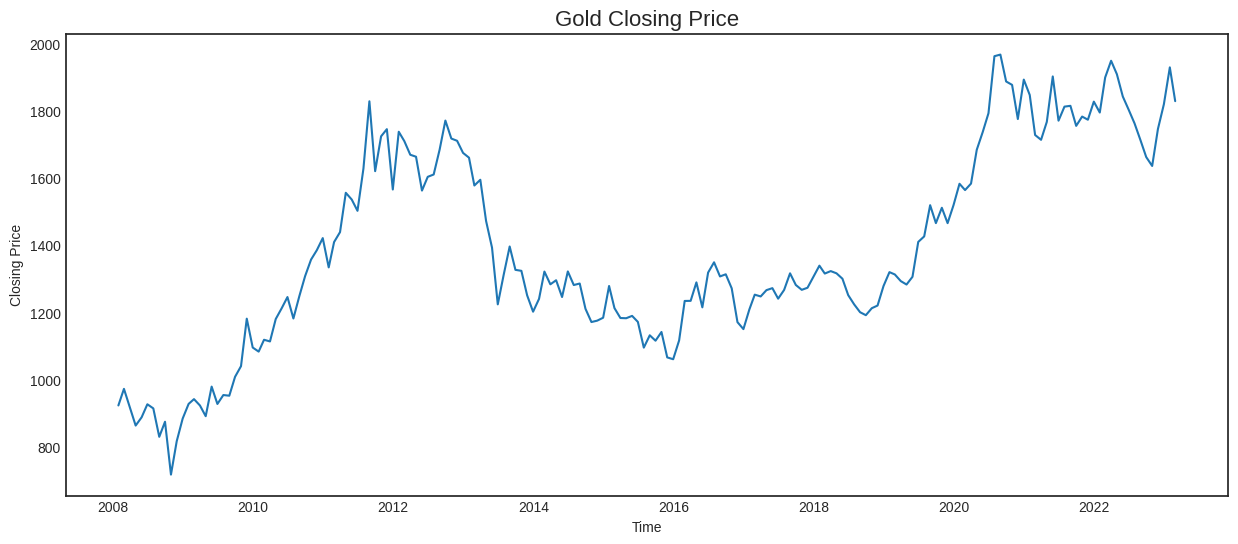

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(gold, label = "Gold")
plt.title('Gold Closing Price', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Closing Price')

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

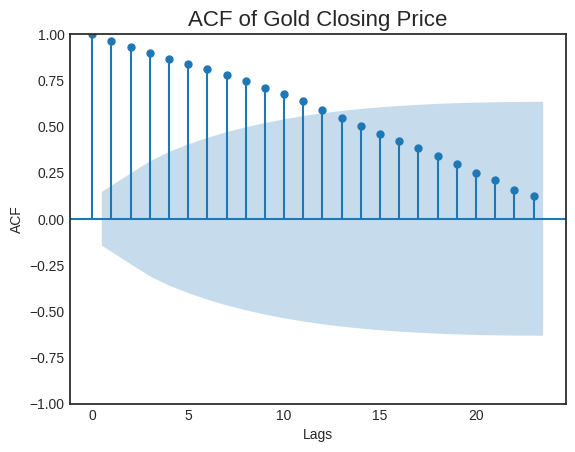

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(gold, label = "Gold")
plt.title('ACF of Gold Closing Price', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

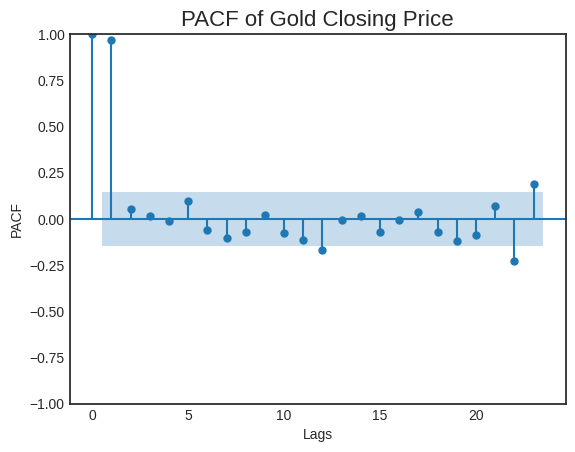

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(gold, label = "Gold")
plt.title('PACF of Gold Closing Price', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('PACF')

Text(0, 0.5, 'Closing Price')

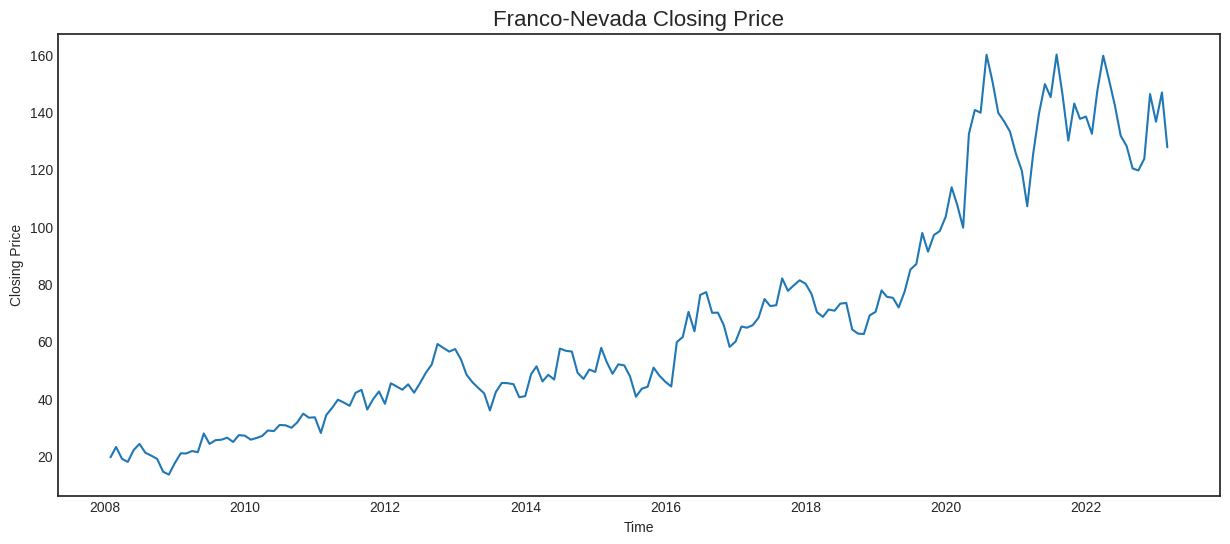

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(mine, label = "Franco-Nevada Mining Company")
plt.title('Franco-Nevada Closing Price', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Closing Price')

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

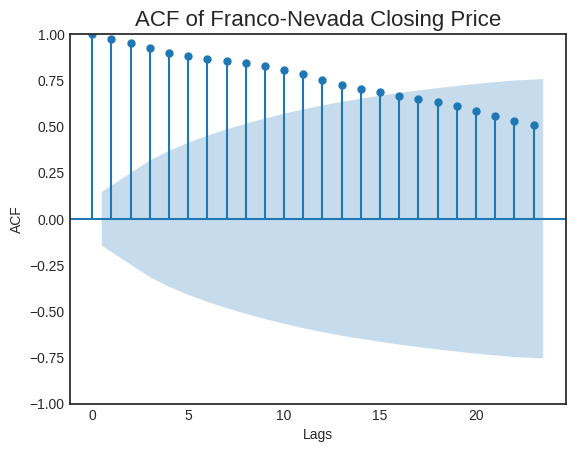

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(mine, label = "Franco-Nevada Mining Company")
plt.title('ACF of Franco-Nevada Closing Price', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

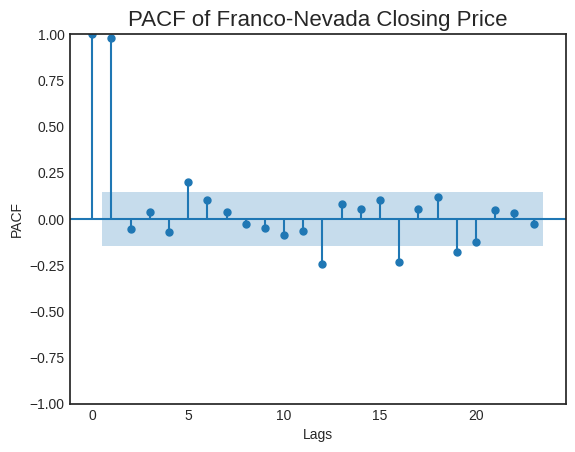

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(mine, label = "Franco-Nevada Mining Company")
plt.title('PACF of Franco-Nevada Closing Price', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('PACF')

# (b) Plot the stl decomposition plot of your data, and discuss the results.

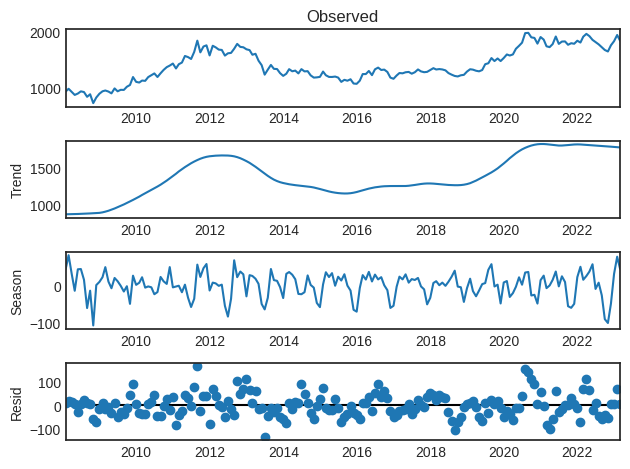

In [ ]:
stlAU = STL(gold)
resultsAU = stlAU.fit()
resultsAU.plot();

Overall there is a slight increase in trend. While there is a flat section between 2014 through 2018, Gold appears to reinstate its upward trend. Seasonality appears to be on display with the first half of the year increasing in the closing price of Gold and the second half of the year experiening a falling closing price. The residuals appear to be relatively centered around zero.

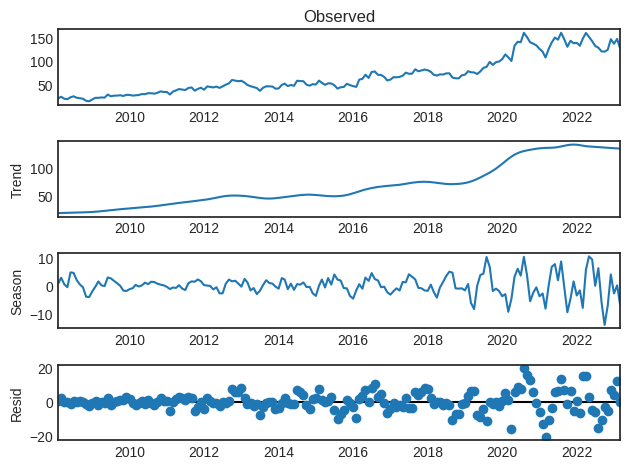

In [ ]:
stlAU = STL(mine)
resultsAU = stlAU.fit()
resultsAU.plot();

There is a strong trend in the closing price for Franco-Nevada mining company. From the stocks IPO, it is experiencing an inreasing trend. Seasanality is more valotile with 2019 beginning to see larger amplitudes in the closing price. The first half of the year increases in closing price and the second half decreases. The residuals seem centered around zero but heteroskedasticity may be present.

# (c) Fit a model that includes, trend, seasonality and cyclical components (not from auto.arima).
# Make sure to discuss your model in detail.

In [ ]:
modelGold = ARIMA(gold, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12),
              trend=(1, 1, 1, 1)).fit()
modelGold.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            Close   No. Observations:                  182
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -1032.077
Date:                          Wed, 17 May 2023   AIC                           2078.154
Time:                                  21:18:57   BIC                           2100.582
Sample:                              01-31-2008   HQIC                          2087.246
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        733.0225    310.931      2.358      0.018     123.608    1342.437
x1            26.8997     11.652      2.308      0.021       4.061      49.738
x2            -0.3368      0.147     -2.291      0.022      -0.625      -0.049
x3             0.0012      0.001      2.368      0.018       0.000       0.002
ar.L1          0.9310      0.026     35.279      0.000       0.879       0.983
ar.S.L12       0.3433      0.078      4.383      0.000       0.190       0.497
sigma2      4411.7165    416.035     10.604      0.000    3596.304    5227.129
===================================================================================
Ljung-Box (L1) (Q):                   3.41   Jarque-Bera (JB):                 4.66
Prob(Q):                              0.06   Prob(JB):                         0.10
Heteroskedasticity (H):               0.69   Skew:                             0.08
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

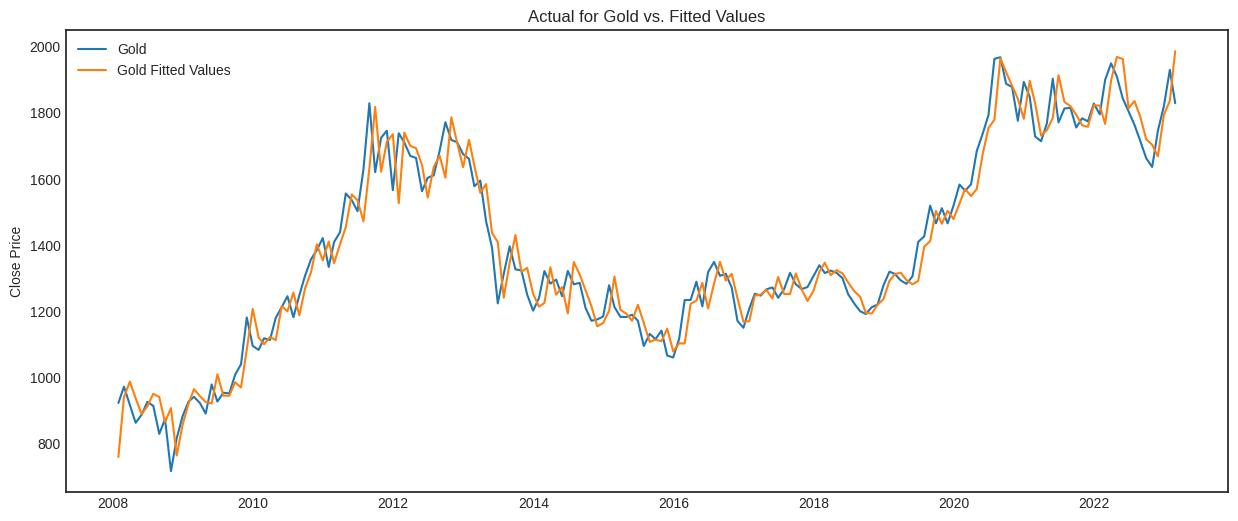

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Actual for Gold vs. Fitted Values')
plt.ylabel('Close Price')
plt.plot(gold, label = 'Gold')
plt.plot(modelGold.fittedvalues, label = 'Gold Fitted Values')
plt.legend()

The ACF for Gold was decaying slowly. The PACF had a spike at lag 1. Later on in the PACF, there was another spike, which indicates seasonality. With this information, we decided an AR(1) process would be best to model the time series. However, the trend appeared to be cubic. To take care of this, we set the trend component in the ARIMA model to be (1, 1, 1, 1) which indicates a cubic trend. The order of the ARIMA model is (1, 0, 0) which allows for an AR(1) process, with 0 for integration and moving average. The seasonal component is set to (1, 0, 0, 12) to indicate an AR(1) process with 0 for integration and 0 for the moving average. The data is monthly, so 12 is used for the seasonal component. 

In [ ]:
modelMine = ARIMA(mine, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12),
              trend=(1, 1)).fit()
modelMine.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            Close   No. Observations:                  182
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -601.772
Date:                          Wed, 17 May 2023   AIC                           1213.544
Time:                                  21:18:58   BIC                           1229.564
Sample:                              01-31-2008   HQIC                          1220.038
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7529     14.278      0.473      0.636     -21.231      34.737
x1             0.6707      0.106      6.357      0.000       0.464       0.878
ar.L1          0.9028      0.032     27.827      0.000       0.839       0.966
ar.S.L12      -0.0018      0.055     -0.033      0.974      -0.110       0.106
sigma2        43.1955      3.339     12.938      0.000      36.652      49.739
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               144.18
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              10.88   Skew:                             1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

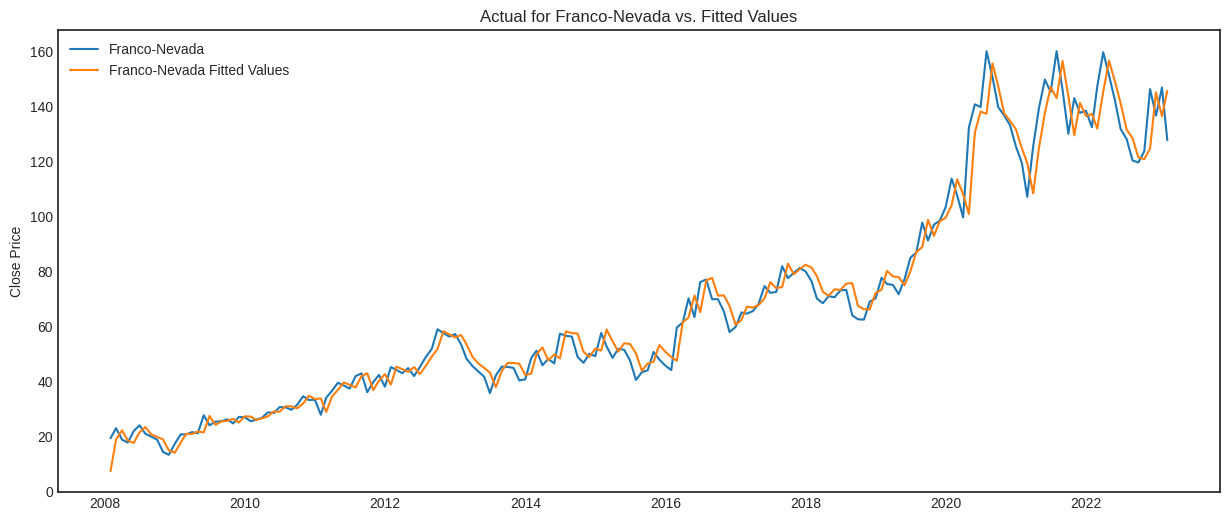

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Actual for Franco-Nevada vs. Fitted Values')
plt.ylabel('Close Price')
plt.plot(mine, label = 'Franco-Nevada')
plt.plot(modelMine.fittedvalues, label = 'Franco-Nevada Fitted Values')
plt.legend()

The ACF for Franco-Nevada was decaying slowly. The PACF had a spike at lag 1. Later on in the PACF, there was another spike, which indicates seasonality. With this information, we decided an AR(1) process would be best to model the time series. The trend appeared to be linear, constant and increasing. To take care of this, we set the trend component in the ARIMA model to be (1, 1) which indicates a linear trend. The order of the ARIMA model is (1, 0, 0) which allows for an AR(1) process, with 0 for integration and moving average. The seasonal component is set to (1, 0, 0, 12) to indicate an AR(1) process with 0 for integration and 0 for the moving average. The data is monthly, so 12 is used for the seasonal component. 

# (e) Plot the respective residuals vs. fitted values and discuss your observations.

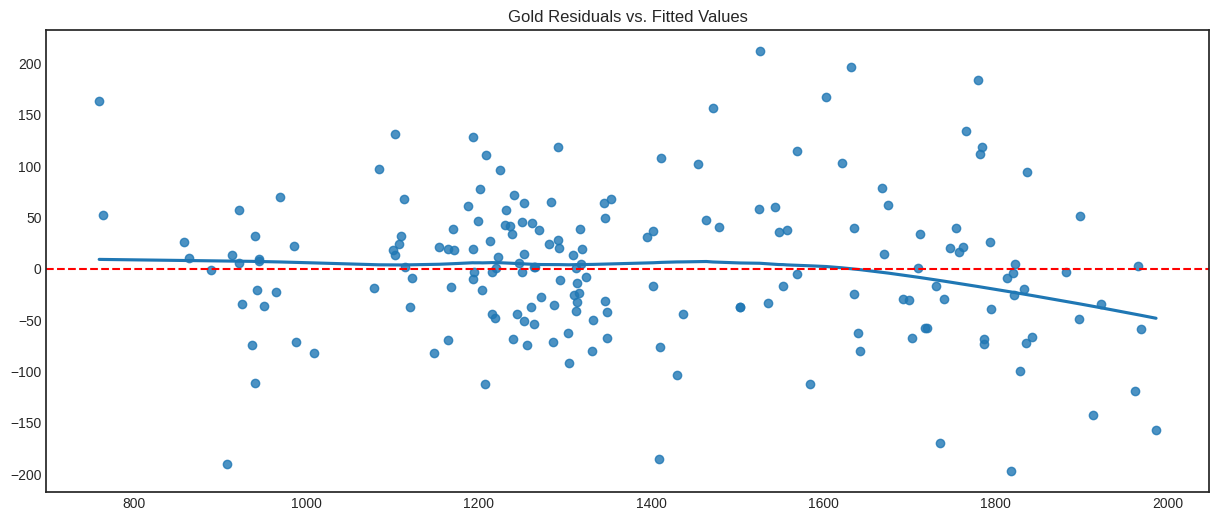

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Gold Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
sns.regplot(x = modelGold.fittedvalues, y = modelGold.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = 'red')
plt.legend()

The blue line follows the red dashed line farily well, meaning our model is capturing most of the information in the data. There is not a pattern or structure in the resudiduals that is not accounted for the model. The observations appear to be centered around zero. There could be some slight heterskedasticity but it is hard to tell.

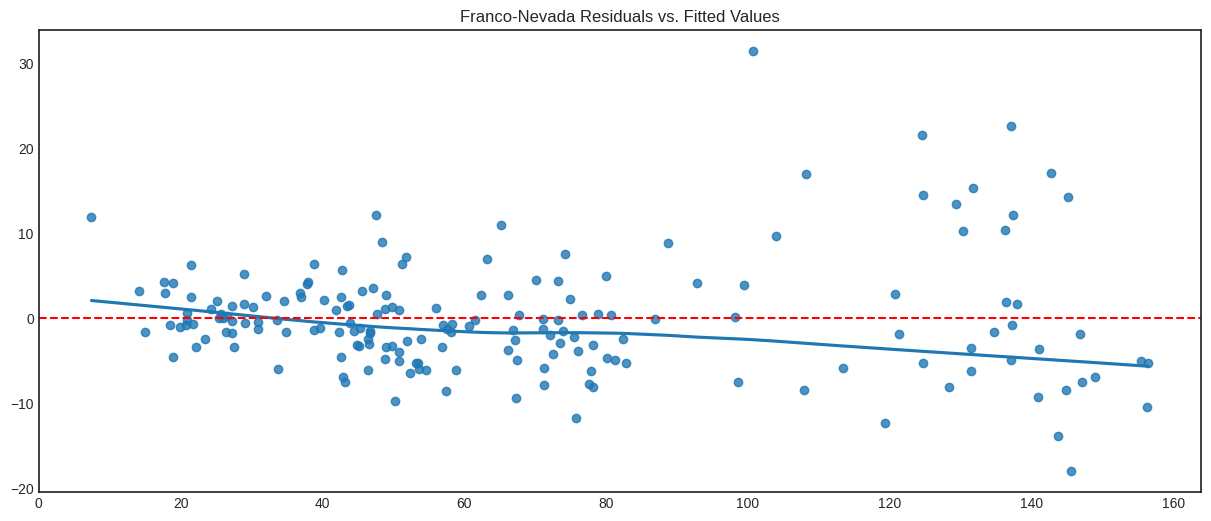

In [ ]:
plt.figure(figsize = (15, 6))
plt.title('Franco-Nevada Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
sns.regplot(x = modelMine.fittedvalues, y = modelMine.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = 'red')
plt.legend()

The blue line does not follow the red dashed line perfectly, indicating the model is not capturing all the information in the data. This could be due to outliers. The residuals also appear to be heterskedastic as the spread is getting larger as the x-axis increases. The observations are fairly centered around zero.

In [ ]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
testGold = sms.het_breuschpagan(modelGold.resid, modelGold.model.exog)
print('BP Results:', ['Gold'])
print(list(zip(name, testGold)))

BP Results: ['Gold']
[('Lagrange multiplier statistic', 9.66527892389954), ('p-value', 0.02163654334823432), ('f-value', 3.3276707825936884), ('f p-value', 0.020908581008600376)]


In [ ]:

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
testMine = sms.het_breuschpagan(modelMine.resid, modelMine.model.exog)
print('BP Results:', ['Mine'])
print(list(zip(name, testMine)))

BP Results: ['Mine']
[('Lagrange multiplier statistic', 23.81902058903971), ('p-value', 1.0583148944905726e-06), ('f-value', 27.104546463125995), ('f p-value', 5.225289806657891e-07)]


We have confirmed there is heteroskedasticity in both models at the 5% level.

# (f) Plot the ACF and PACF of the respective residuals and interpret the plots.

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

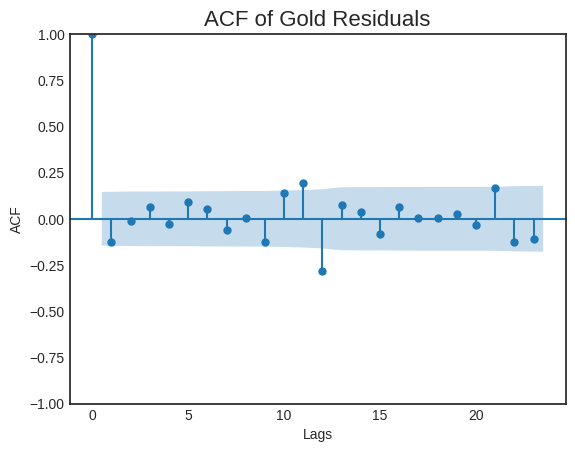

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(modelGold.resid, label = "Gold Residuals")
plt.title('ACF of Gold Residuals', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

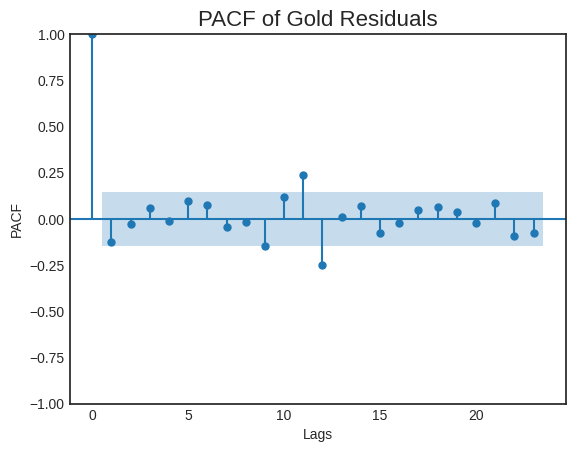

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(modelGold.resid, label = "Gold Residuals")
plt.title('PACF of Gold Residuals', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('PACF')

Our ACF and PACF plot of the residuals for gold are not perfect. Some of the spikes are outside the bands, but very few are. The majority of the spikes are within the band. Some unmoeled patterns or randomness in the data can be causing these larger spikes.

Text(0, 0.5, 'ACF')

<Figure size 1500x600 with 0 Axes>

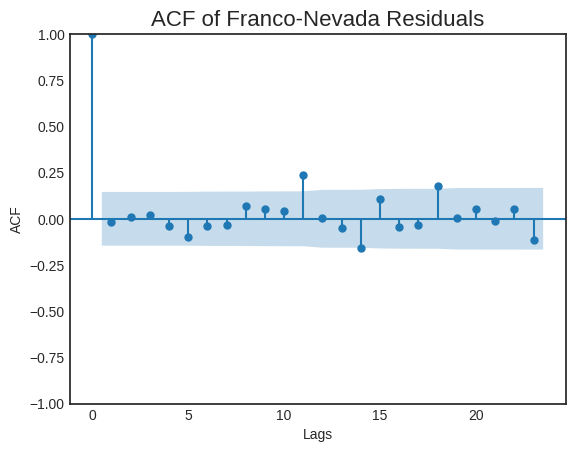

In [ ]:
plt.figure(figsize=(15,6))
plot_acf(modelMine.resid, label = "Franco-Nevada Residuals")
plt.title('ACF of Franco-Nevada Residuals', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('ACF')

Text(0, 0.5, 'PACF')

<Figure size 1500x600 with 0 Axes>

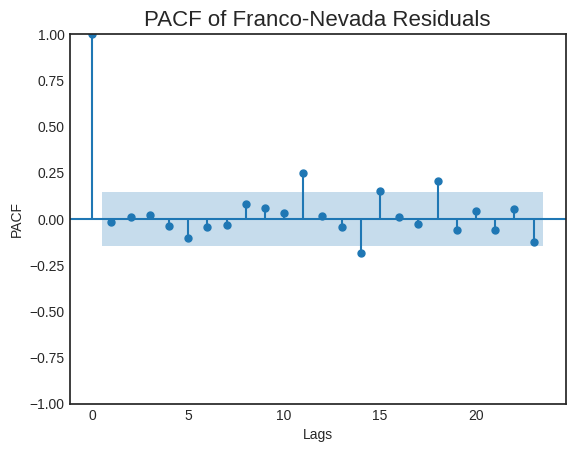

In [ ]:
plt.figure(figsize=(15,6))
plot_pacf(modelMine.resid, label = "Franco-Nevada Residuals")
plt.title('PACF of Franco-Nevada Residuals', fontsize=16)
plt.xlabel('Lags')
plt.ylabel('PACF')

Our ACF and PACF plot of the residuals for gold are not perfect. Some of the spikes are outside the bands, but very few are. The majority of the spikes are within the band. Some unmoeled patterns or randomness in the data can be causing these larger spikes.

# (g) Plot the respective CUSUM and interpret the plot.

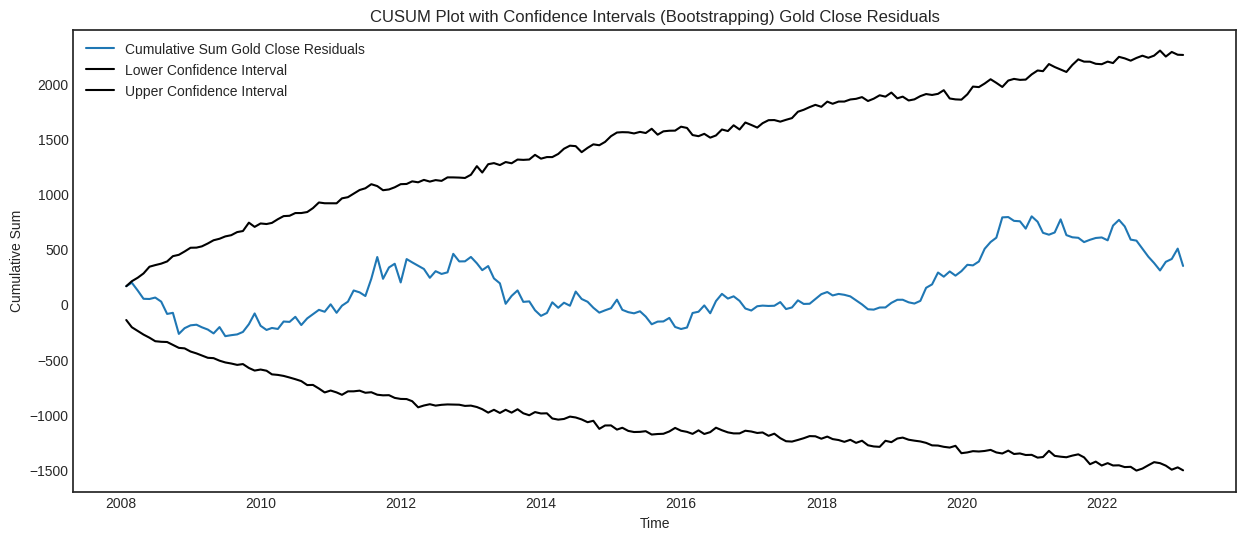

In [ ]:
cumulative_sum = np.cumsum(modelGold.resid)
residuals = modelGold.resid

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize an array to store the bootstrap cumulative sums
bootstrap_cumulative_sums = np.zeros((n_bootstraps, len(cumulative_sum)))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Generate a bootstrap sample by randomly sampling residuals with replacement
    bootstrap_sample = np.random.choice(residuals, size=len(residuals), replace=True)
    # Calculate the cumulative sum for the bootstrap sample
    bootstrap_cumulative_sums[i] = np.cumsum(bootstrap_sample)

# Calculate confidence intervals from the bootstrap distribution
lower_confidence_interval = np.percentile(bootstrap_cumulative_sums, 2.5, axis=0)
upper_confidence_interval = np.percentile(bootstrap_cumulative_sums, 97.5, axis=0)
cumulative_sum = pd.DataFrame(cumulative_sum)
lower_confidence_interval = pd.DataFrame(lower_confidence_interval, index = cumulative_sum.index)
upper_confidence_interval = pd.DataFrame(upper_confidence_interval, index = cumulative_sum.index)

# Plot the cumulative sum with confidence intervals
plt.figure(figsize = (15,6))
plt.plot(cumulative_sum, label='Cumulative Sum Gold Close Residuals')
plt.plot(lower_confidence_interval, color='black', label='Lower Confidence Interval')
plt.plot(upper_confidence_interval, color='black', label='Upper Confidence Interval')
plt.title('CUSUM Plot with Confidence Intervals (Bootstrapping) Gold Close Residuals')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.show()


The cumsum for statsmodels does not take in ARIMA. Cumsum only takes in other statsmodels functions like smf.ols regressions. The confidence intervals are generated via bootstrap. Looking at the plot there does not appear to be any structural breaks. A structural break means there could be change in the mean or variance of the gold series, a shift in the trend, or seasonality or other structural changes. From the gold plot, the change in trend happens in 2012 and in 2021. This could have caused a structural break as the trend follows a cubic pattern, but there were zero breaks.

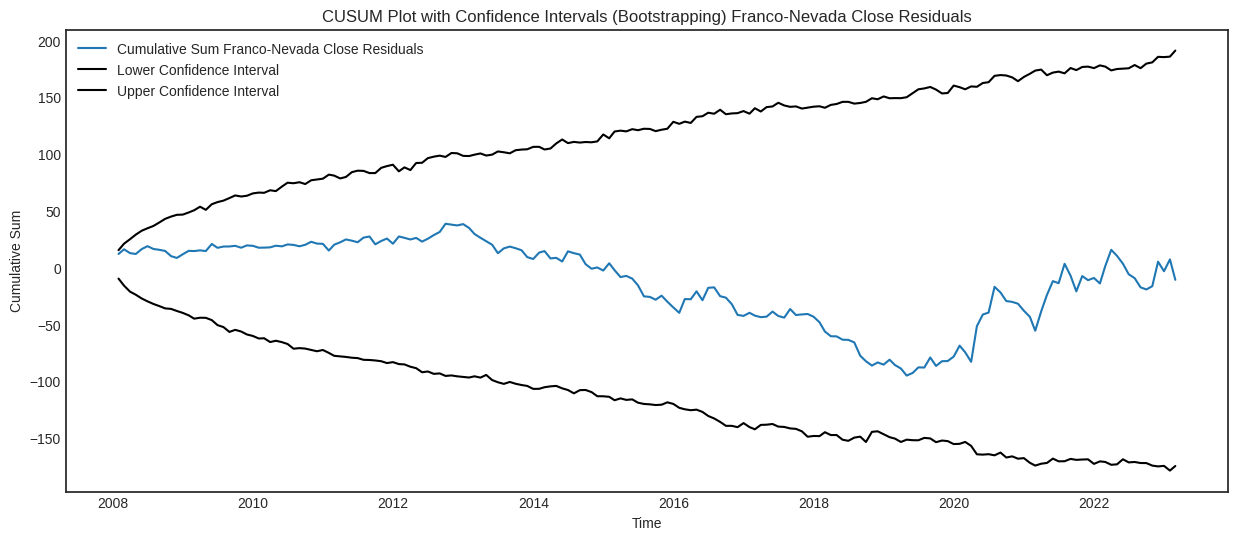

In [ ]:
cumulative_sum = np.cumsum(modelMine.resid)
residuals = modelMine.resid

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize an array to store the bootstrap cumulative sums
bootstrap_cumulative_sums = np.zeros((n_bootstraps, len(cumulative_sum)))

# Perform bootstrapping
for i in range(n_bootstraps):
    # Generate a bootstrap sample by randomly sampling residuals with replacement
    bootstrap_sample = np.random.choice(residuals, size=len(residuals), replace=True)
    # Calculate the cumulative sum for the bootstrap sample
    bootstrap_cumulative_sums[i] = np.cumsum(bootstrap_sample)

# Calculate confidence intervals from the bootstrap distribution
lower_confidence_interval = np.percentile(bootstrap_cumulative_sums, 2.5, axis=0)
upper_confidence_interval = np.percentile(bootstrap_cumulative_sums, 97.5, axis=0)
cumulative_sum = pd.DataFrame(cumulative_sum)
lower_confidence_interval = pd.DataFrame(lower_confidence_interval, index = cumulative_sum.index)
upper_confidence_interval = pd.DataFrame(upper_confidence_interval, index = cumulative_sum.index)

# Plot the cumulative sum with confidence intervals
plt.figure(figsize = (15,6))
plt.plot(cumulative_sum, label='Cumulative Sum Franco-Nevada Close Residuals')
plt.plot(lower_confidence_interval, color='black', label='Lower Confidence Interval')
plt.plot(upper_confidence_interval, color='black', label='Upper Confidence Interval')
plt.title('CUSUM Plot with Confidence Intervals (Bootstrapping) Franco-Nevada Close Residuals')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.show()


The cumulative sum plot for Franco-Nevada residuals appears to have zero structural breaks. Looking at the graph of Franco-Nevada's closing prices does not appear to be any significant changes in the trend. The variance after 2019 shows larger amplitude fluctuations for the closing price of Franco-Nevada. This could have causeda structural break since the variance becomes larger after 2019, but there are zero structural breaks.

# (h) For your model, discuss the associated diagnostic statistics.

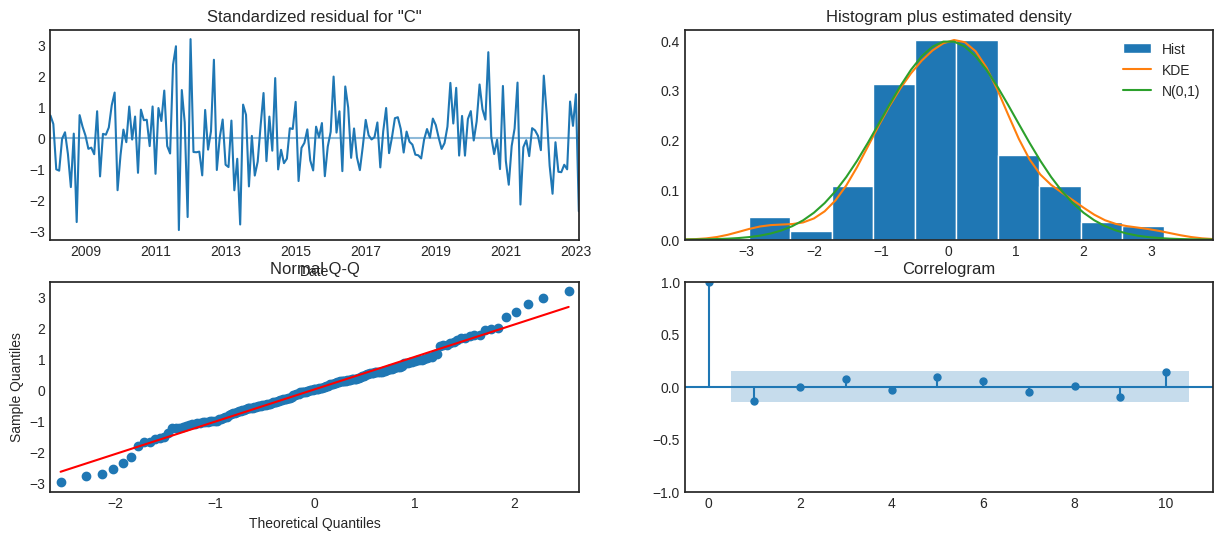

In [ ]:
modelGold.plot_diagnostics(figsize = (15, 6));

The standardized residuals appear to be centered around zero. The Q-Q plot follows the red line for the most part. This means the distribution is pretty normal. Looking at the histogram you can see that the distribution is not perfectly normal and distributed evenly, but it is pretty close to normal. The normal distribution is in green, the KDE follows it closely. Looking at the correlogram, there are zero spikes outside the bands, meaning there is not significant serial correlation. The gold closing price may be random according to correlogram.

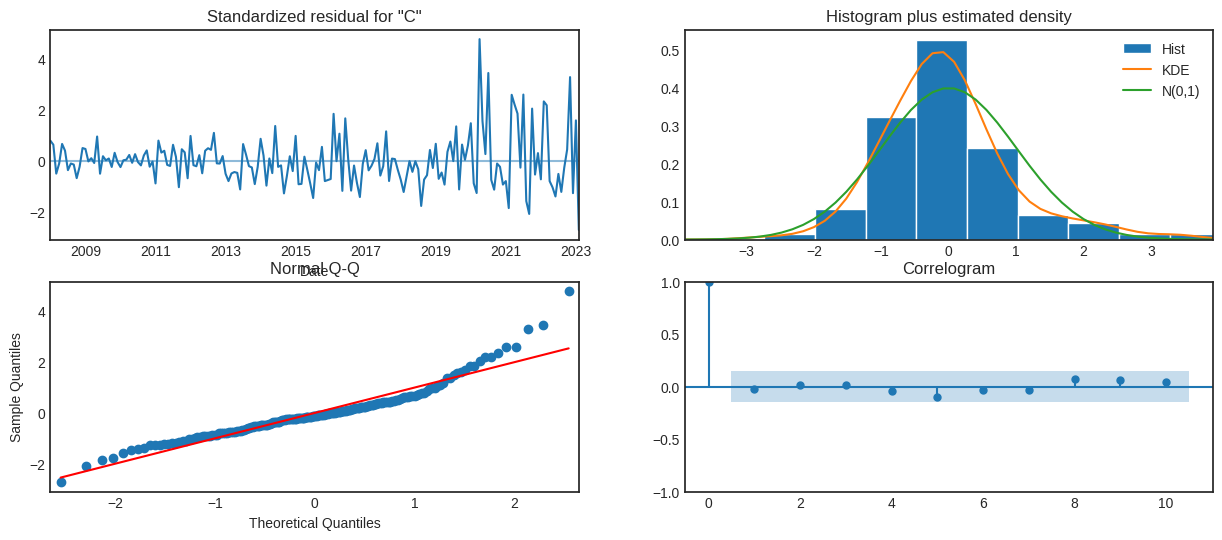

In [ ]:
modelMine.plot_diagnostics(figsize = (15, 6));

The standardized residual appear to be centered around zero, but the width of the observations are expanding as the x-axis increases. Franco-Nevada is experiencing heteroskedasticity. The Q-Q plot does not follow the red line as close as gold, so Franco-Nevada is most likely not normal. The histogram confirms this theaory as the distribution appears to be right skewed. The green line shows what a normal distribution looks like, and the KDE does not follow it. The correlogram shows zero spikes outside the bands. This indicates the closing price of Franco-Nevada is most likely random and there is likely zero serial correlation.

# (i) Use your model to forecast 12-steps ahead. Your forecast should include the respective error bands.

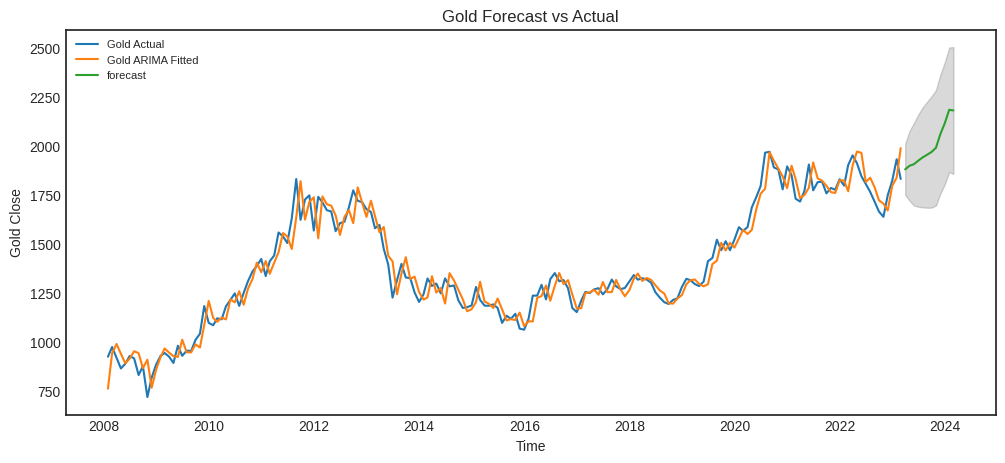

In [ ]:
# Forecast
#fc, se,  conf = fitted.forecast(24, alpha=0.05)  # 95% conf
fc = modelGold.forecast(12, alpha=0.05) 
#se = fitted.get_forecast(24).conf_int()
# Make as pandas series
fc_seriesGold = pd.Series(fc, index=modelGold.get_forecast(12).conf_int().index)

lower_series = modelGold.get_forecast(12).conf_int()["lower Close"]
upper_series = modelGold.get_forecast(12).conf_int()["upper Close"]
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(gold, label='Gold Actual')
plt.plot(modelGold.fittedvalues, label='Gold ARIMA Fitted')
plt.plot(fc_seriesGold, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Gold Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Time')
plt.ylabel('Gold Close')
plt.show()

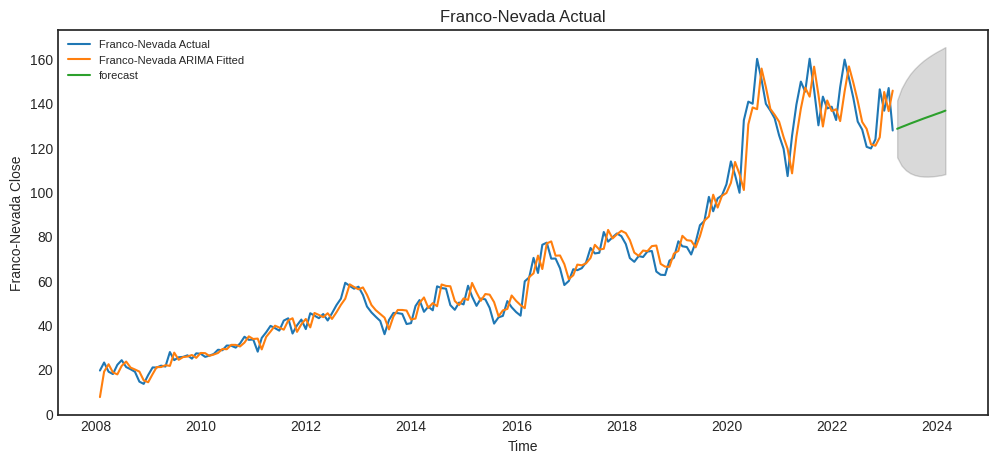

In [ ]:
# Forecast
#fc, se,  conf = fitted.forecast(24, alpha=0.05)  # 95% conf
fc = modelMine.forecast(12, alpha=0.05) 
#se = fitted.get_forecast(24).conf_int()
# Make as pandas series
fc_series = pd.Series(fc, index=modelMine.get_forecast(12).conf_int().index)

lower_series = modelMine.get_forecast(12).conf_int()["lower Close"]
upper_series = modelMine.get_forecast(12).conf_int()["upper Close"]
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(mine, label='Franco-Nevada Actual')
plt.plot(modelMine.fittedvalues, label='Franco-Nevada ARIMA Fitted')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Franco-Nevada Actual')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel('Time')
plt.ylabel('Franco-Nevada Close')
plt.show()

# (j) Compare your forecast from (i) to the 12-steps ahead forecasts from auto.arima, ets, and Holt-Winters models. Which model performs best in terms of MAPE? Note: For computing MAPE, you can use the last 12 observations as your test sample.

**Auto-Arima Gold**

In [ ]:
smodelGold = pm.auto_arima(gold, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodelGold.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2020.005, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1968.220, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2013.528, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1961.501, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1961.143, Time=0.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1967.831, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1942.205, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=3.16 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  182
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -968.103
Date:                              Wed, 17 May 2023   AIC                           1942.205
Time:                                      21:19:17   BIC                           1951.595
Sample:                                  01-31-2008   HQIC                          1946.016
                                       - 02-28-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0297      0.104     -0.287      0.774      -0.233       0.173
ma.S.L12      -0.8841      0.115     -7.704      0.000      -1.109      -0.659
sigma2      4962.7451    613.171      8.094      0.000    3760.953    6164.538
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.11   Prob(JB):                         0.58
Heteroskedasticity (H):               0.63   Skew:                            -0.08
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

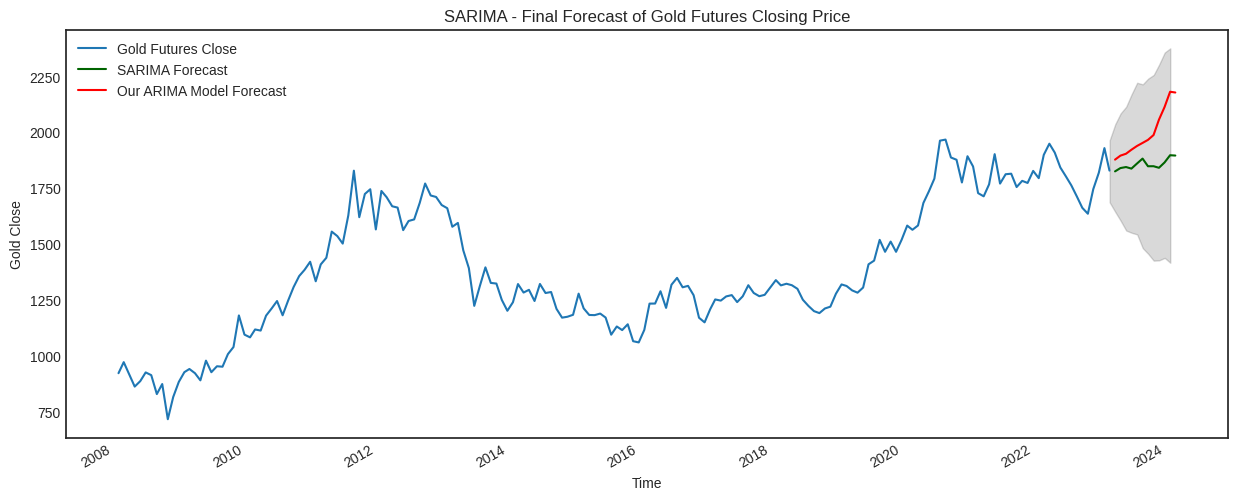

In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodelGold.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(gold.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,6))
plt.plot(gold, label='Gold Futures Close')
plt.plot(smodelGold.predict(12), color='darkgreen', label = 'SARIMA Forecast')
fc_seriesGold.plot(color="r", legend=True, label="Our ARIMA Model Forecast")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Gold Futures Closing Price")
plt.xlabel('Time')
plt.ylabel('Gold Close')
plt.legend()
plt.show()

Our ARIMA model predicted much favorable conditions for gold futures compared to the SARIMA model. The SARIMA is a bit more flat.

**Auto-Arima Franco-Nevada**

In [ ]:
smodelMine = pm.auto_arima(mine, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodelMine.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1159.348, Time=0.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1241.517, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1196.243, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1160.790, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1239.655, Time=0.05 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1160.218, Time=1.12 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1159.892, Time=1.79 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1198.242, Time=0.21 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1160.813, Time=0.22 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1164.813, Time=0.39 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1161.348, Time=1.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1159.777, Time=0.10 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1162.747, Time=0.34 sec
 ARIMA(2,1,0)(0,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  182
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -575.674
Date:                            Wed, 17 May 2023   AIC                           1159.348
Time:                                    21:19:31   BIC                           1171.868
Sample:                                01-31-2008   HQIC                          1164.429
                                     - 02-28-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7956      0.095      8.372      0.000       0.609       0.982
ma.L1         -0.8988      0.074    -12.134      0.000      -1.044      -0.754
ma.S.L12      -0.8786      0.069    -12.732      0.000      -1.014      -0.743
sigma2        47.8421      4.057     11.792      0.000      39.890      55.794
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                74.05
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               8.49   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

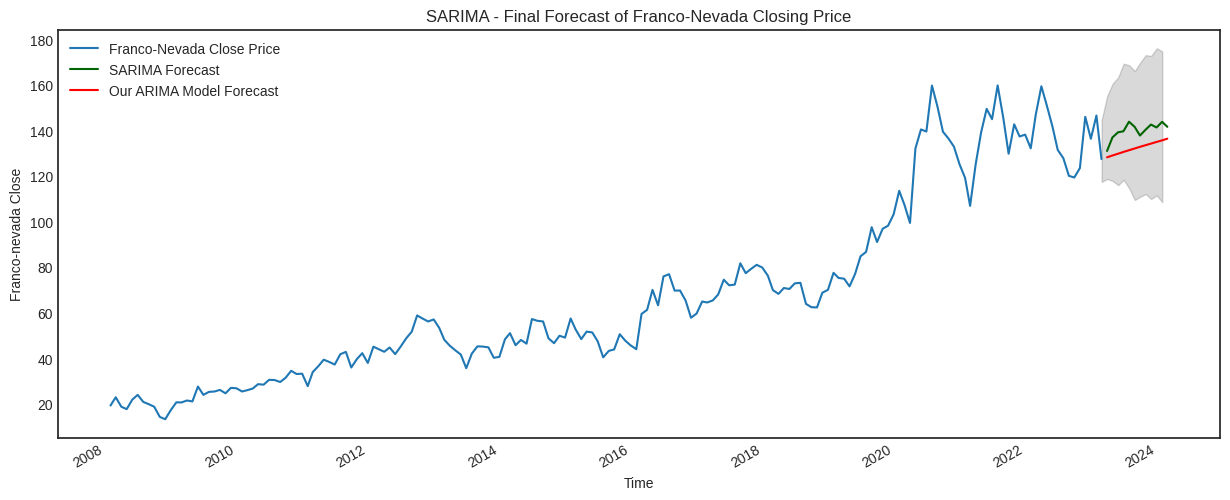

In [ ]:
# Forecast
n_periods = 12
fitted, confint = smodelMine.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(mine.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,6))
plt.plot(mine, label = 'Franco-Nevada Close Price')
plt.plot(smodelMine.predict(12), color='darkgreen', label='SARIMA Forecast')
fc_series.plot(color="r", legend=True, label="Our ARIMA Model Forecast")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Franco-Nevada Closing Price")
plt.xlabel('Time')
plt.ylabel('Franco-nevada Close')
plt.legend()
plt.show()

The SARIMA model for Franco-Nevada is above our ARIMA model. SARIMA believes the Franco-Nevada closing price will do well in the future.

**ETS Gold**

In [ ]:
etsModelGold=sm.tsa.statespace.ExponentialSmoothing(gold,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fcModelGold = etsModelGold.forecast(12) #inverting the Log

<Axes: xlabel='Time', ylabel='Gold Futures Close'>

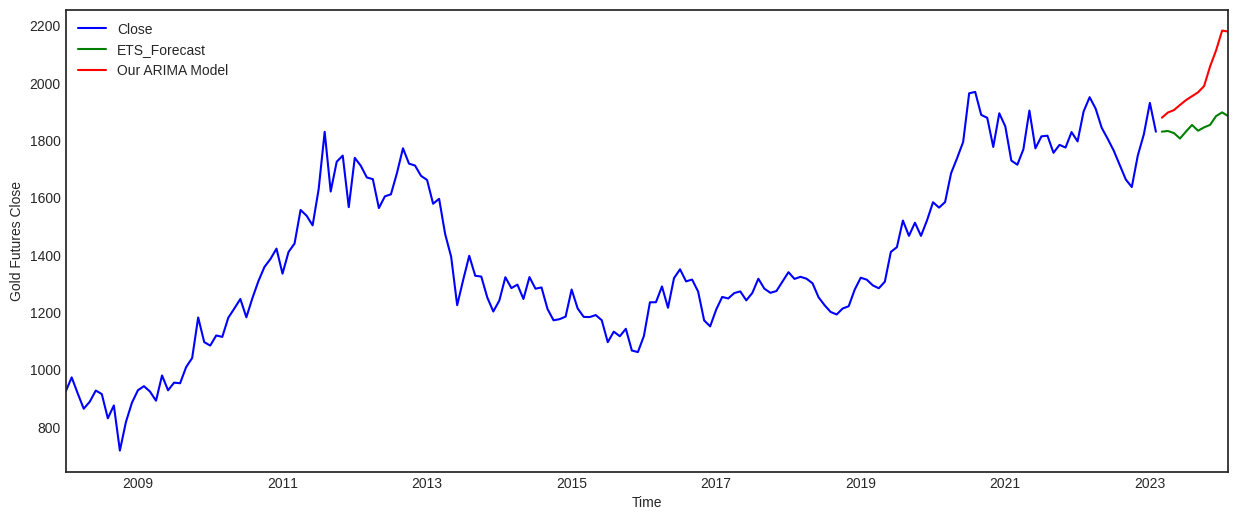

In [ ]:
gold.plot(figsize=(15,6), color="blue", legend=True, label="Gold Futures Close")
plt.xlabel('Time')
plt.ylabel('Gold Futures Close')
fcModelGold.plot(color="g", legend=True, label="ETS_Forecast")
fc_seriesGold.plot(color="r", legend=True, label="Our ARIMA Model")

Again, our ARIMA model forecasts the futures price of gold to be well above the ETS forecast. The ETS forecast appears to be a bit flat.

**ETS Franco-Nevada**

In [ ]:
etsModelMine=sm.tsa.statespace.ExponentialSmoothing(mine,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fcModelMine = etsModelMine.forecast(12) #inverting the Log

<Axes: xlabel='Time', ylabel='Franco-Nevada Close'>

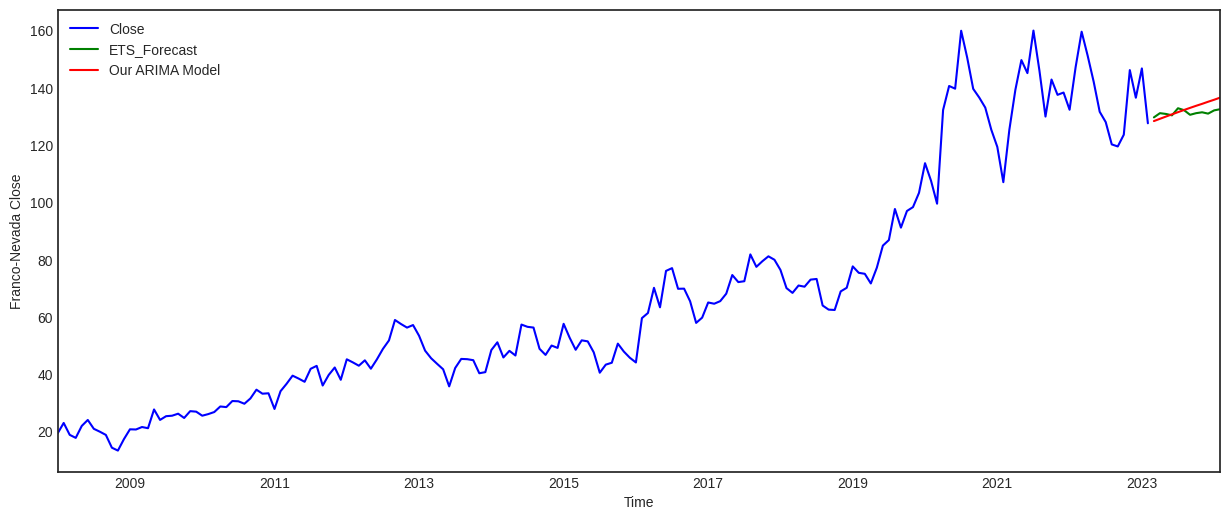

In [ ]:
mine.plot(figsize=(15,6), color="blue", legend=True, label="Franco-Nevada Close")
plt.xlabel('Time')
plt.ylabel('Franco-Nevada Close')
fcModelMine.plot(color="g", legend=True, label="ETS_Forecast")
fc_series.plot(color="r", legend=True, label="Our ARIMA Model")

The ETS forecast and our ARIMA model are comparable. They both forecast Franco-Nevada's closing price to be flat.

**Holt-Winters Gold**

In [ ]:
hw_modelGold = HWES(gold, seasonal_periods=12, trend='mul', seasonal='add')
hw_fittedGold = hw_modelGold.fit()
goldForecast = hw_fittedGold.forecast(steps=12)
print(hw_fittedGold.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  182
Model:             ExponentialSmoothing   SSE                         790280.283
Optimized:                         True   AIC                           1556.457
Trend:                   Multiplicative   BIC                           1607.721
Seasonal:                      Additive   AICC                          1560.653
Seasonal Periods:                    12   Date:                 Wed, 17 May 2023
Box-Cox:                          False   Time:                         21:30:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8502832                alpha                 True
smoothing_trend          

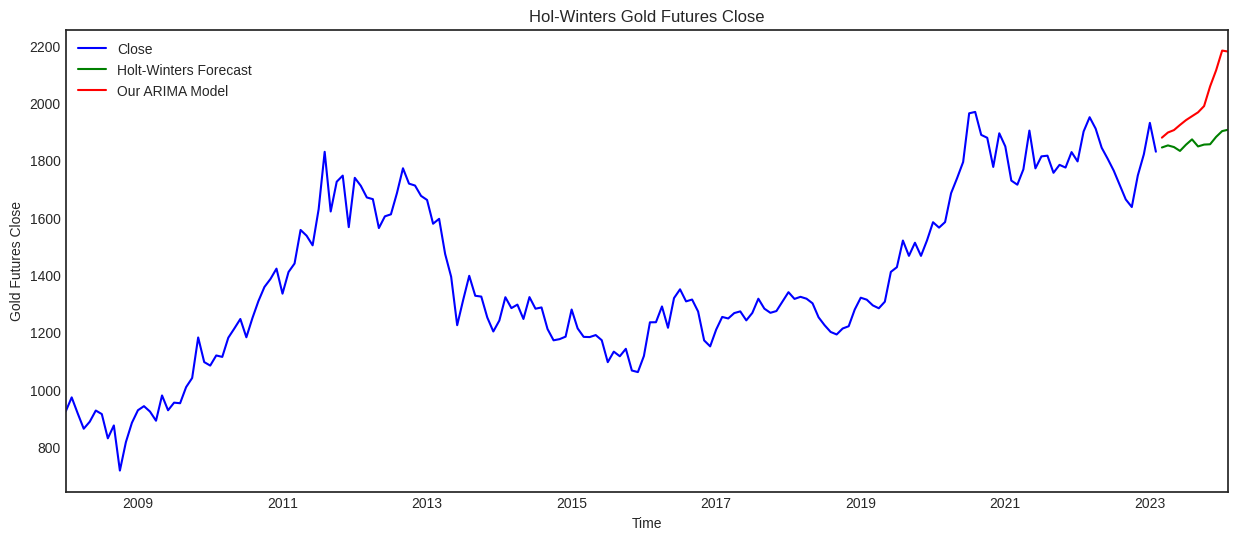

In [ ]:
gold.plot(figsize=(15,6), color="blue", legend=True, label="Gold Futures Close")
plt.title('Hol-Winters Gold Futures Close')
goldForecast.plot(color="g", legend=True, label="Holt-Winters Forecast")
fc_seriesGold.plot(color="r", legend=True, label="Our ARIMA Model")
plt.xlabel('Time')
plt.ylabel('Gold Futures Close')
plt.show()

Our ARIMA model predicts Gold futures to climb rapidly while the Holt-Winters model forecasts Gold futures closing price to be flat.

**Holt-Winters Franco-Nevada**

In [ ]:
hw_modelMine = HWES(mine, seasonal_periods=12, trend='mul', seasonal='mul')
hw_fittedMine = hw_modelMine.fit()
mineForecast = hw_fittedMine.forecast(steps=12)
print(hw_fittedMine.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  182
Model:             ExponentialSmoothing   SSE                           6908.923
Optimized:                         True   AIC                            693.854
Trend:                   Multiplicative   BIC                            745.118
Seasonal:                Multiplicative   AICC                           698.051
Seasonal Periods:                    12   Date:                 Wed, 17 May 2023
Box-Cox:                          False   Time:                         21:34:28
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9289393                alpha                 True
smoothing_trend          

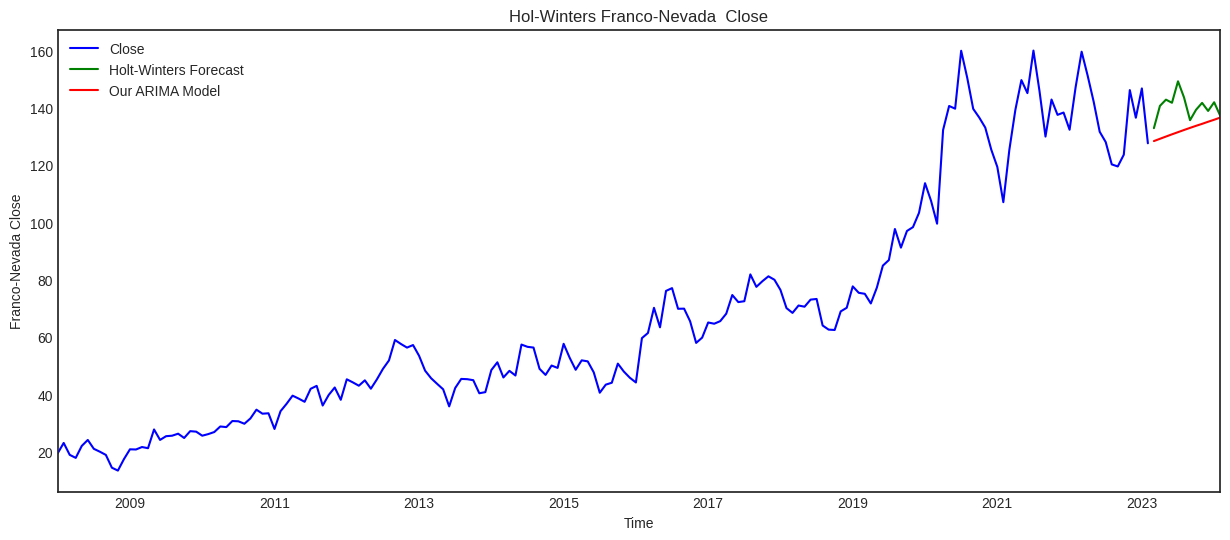

In [ ]:
mine.plot(figsize=(15,6), color="blue", legend=True, label="Franco-Nevada Close")
plt.title('Hol-Winters Franco-Nevada  Close')
mineForecast.plot(color="g", legend=True, label="Holt-Winters Forecast")
fc_series.plot(color="r", legend=True, label="Our ARIMA Model")
plt.xlabel('Time')
plt.ylabel('Franco-Nevada Close')
plt.show()

The Holt-Winters forecast sees a lot of fluctuations in 2022 with a large increase in closing price but the ARIMA model and Holt-Winters forecast end up close to each other in the end.

**Mape**

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [ ]:
trainGold = gold[:-12]
testGold = gold[-12:]
trainMine = mine[:-12]
testMine = mine[-12:]

**Auto-Arima Gold Train**

In [ ]:
smodelGoldTrain = pm.auto_arima(trainGold, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodelGoldTrain.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1802.497, Time=2.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1871.732, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1820.303, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1800.522, Time=1.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1864.499, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1820.492, Time=0.42 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.94 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1802.820, Time=0.30 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1800.553, Time=1.27 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1804.133, Time=2.33 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1802.486, Time=2.61 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  170
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -897.261
Date:                            Wed, 17 May 2023   AIC                           1800.522
Time:                                    21:50:53   BIC                           1809.691
Sample:                                01-31-2008   HQIC                          1804.246
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1654      0.062     -2.653      0.008      -0.288      -0.043
ma.S.L12      -0.8643      0.110     -7.840      0.000      -1.080      -0.648
sigma2      4860.7310    571.221      8.509      0.000    3741.158    5980.304
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.98   Prob(JB):                         0.45
Heteroskedasticity (H):               0.57   Skew:                            -0.04
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
smodelGoldTrainPred = smodelGoldTrain.predict(12)

**Auto-Arima Franco-Nevada Train**

In [ ]:
smodelMineTrain = pm.auto_arima(trainMine, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodelMineTrain.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1057.119, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.663, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1065.760, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1199.923, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1362.626, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1119.323, Time=0.09 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1057.735, Time=0.63 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1057.855, Time=0.96 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1067.599, Time=0.41 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1056.409, Time=0.79 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1118.784, Time=0.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1056.670, Time=0.93 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1056.901, Time=1.78 sec
 ARIMA(1,0,0)(1,1,2)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  170
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -524.205
Date:                              Wed, 17 May 2023   AIC                           1056.409
Time:                                      21:52:28   BIC                           1068.660
Sample:                                  01-31-2008   HQIC                          1061.385
                                       - 02-28-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5774      0.320      1.807      0.071      -0.049       1.204
ar.L1          0.9343      0.029     32.447      0.000       0.878       0.991
ma.S.L12      -0.7930      0.076    -10.472      0.000      -0.941      -0.645
sigma2        41.0542      3.678     11.163      0.000      33.846      48.262
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):               159.59
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               6.18   Skew:                             1.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
smodelMineTrainPred = smodelMineTrain.predict(12)

**ETS Gold Train**

In [ ]:
etsModelGoldTrain=sm.tsa.statespace.ExponentialSmoothing(trainGold,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fcModelGoldTrain = etsModelGoldTrain.forecast(12) #inverting the Log

**ETS Franco-Nevada Train**

In [ ]:
etsModelMineTrain=sm.tsa.statespace.ExponentialSmoothing(trainMine,
                                           trend=True, 
                                           initialization_method= 'heuristic', 
                                           seasonal=12, 
                                           damped_trend=False).fit()
fcModelMineTrain = etsModelMineTrain.forecast(12) #inverting the Log

**Holt-Winters Gold Train**

In [ ]:
hw_modelGoldTrain = HWES(trainGold, seasonal_periods=12, trend='mul', seasonal='add')
hw_fittedGoldTrain = hw_modelGoldTrain.fit()
goldTrainForecast = hw_fittedGoldTrain.forecast(steps=12)
print(hw_fittedGoldTrain.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  170
Model:             ExponentialSmoothing   SSE                         760185.525
Optimized:                         True   AIC                           1460.938
Trend:                   Multiplicative   BIC                           1511.111
Seasonal:                      Additive   AICC                          1465.468
Seasonal Periods:                    12   Date:                 Wed, 17 May 2023
Box-Cox:                          False   Time:                         21:55:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8182143                alpha                 True
smoothing_trend          

**Holt-Winters Franco-Nevada Train**

In [ ]:
hw_modelMineTrain = HWES(trainMine, seasonal_periods=12, trend='mul', seasonal='mul')
hw_fittedMineTrain = hw_modelMineTrain.fit()
mineTrainForecast = hw_fittedMineTrain.forecast(steps=12)
print(hw_fittedMineTrain.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  170
Model:             ExponentialSmoothing   SSE                           4923.816
Optimized:                         True   AIC                            604.227
Trend:                   Multiplicative   BIC                            654.400
Seasonal:                Multiplicative   AICC                           608.757
Seasonal Periods:                    12   Date:                 Wed, 17 May 2023
Box-Cox:                          False   Time:                         21:56:04
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8371739                alpha                 True
smoothing_trend          

In [ ]:
print('SARIMA Gold')
forecast_accuracy(smodelGoldTrainPred, testGold['Close'])

SARIMA Gold


{'mape': 0.0820412983051982,
 'me': 127.94066021062116,
 'mae': 142.64403407069588,
 'mpe': 0.07447472585189913,
 'rmse': 168.49860169978766,
 'corr': -0.36511696857810744,
 'minmax': 0.0735905821973386}

In [ ]:
print('SARIMA Mine')
forecast_accuracy(smodelMineTrainPred, testMine['Close'])

SARIMA Mine


{'mape': 0.13716771270391592,
 'me': 15.392832588410394,
 'mae': 17.605918509532202,
 'mpe': 0.12322412321680658,
 'rmse': 21.260742325031647,
 'corr': -0.25045990620529784,
 'minmax': 0.11441698535259981}

In [ ]:
print('ETS Gold')
forecast_accuracy(fcModelGoldTrain, testGold['Close'])

ETS Gold


{'mape': 0.069893480675987,
 'me': 108.73623321837994,
 'mae': 121.34889846409861,
 'mpe': 0.0634022979981985,
 'rmse': 145.87122607759224,
 'corr': 0.10183016130496925,
 'minmax': 0.06344790372887166}

In [ ]:
print('ETS Mine')
forecast_accuracy(fcModelMineTrain, testMine['Close'])

ETS Mine


{'mape': 0.11965274501655211,
 'me': 12.677821479122551,
 'mae': 15.367814169789943,
 'mpe': 0.1026129625020016,
 'rmse': 18.204220491243866,
 'corr': -0.480383145122768,
 'minmax': 0.10257086215493116}

In [ ]:
print('Holt-Winters Gold')
forecast_accuracy(goldTrainForecast, testGold['Close'])

Holt-Winters Gold


{'mape': 0.08495084614632677,
 'me': 135.25102538268885,
 'mae': 148.13244840886543,
 'mpe': 0.07832594280000563,
 'rmse': 172.55388431098373,
 'corr': -0.06510571038883824,
 'minmax': 0.07611910536990729}

In [ ]:
print('Holt-Winters Mine')
forecast_accuracy(mineTrainForecast, testMine['Close'])

Holt-Winters Mine


{'mape': 0.2554551291581628,
 'me': 30.885625391174756,
 'mae': 33.218305517766844,
 'mpe': 0.24083200939816174,
 'rmse': 36.35687003792108,
 'corr': -0.6865591442622428,
 'minmax': 0.1954866633780723}

ETS Gold forecast has the lowest MAPE at 0.069893480675987. ETS Franco-Nevada forecast has the lowest MAPE at 0.11965274501655211.

# (k) Fit an appropriate VAR model using your two variables. Make sure to show the relevant plotsand discuss your results from the fit.

In [ ]:
combo = gold.copy()
combo['mineClose'] = mine['Close']
combo.head()

,Close,mineClose
Date,,
2008-01-31,922.700012,19.389999
2008-02-29,972.099976,23.010000
2008-03-31,916.200012,18.860001
2008-04-30,862.799988,17.799999
2008-05-31,887.299988,21.969999


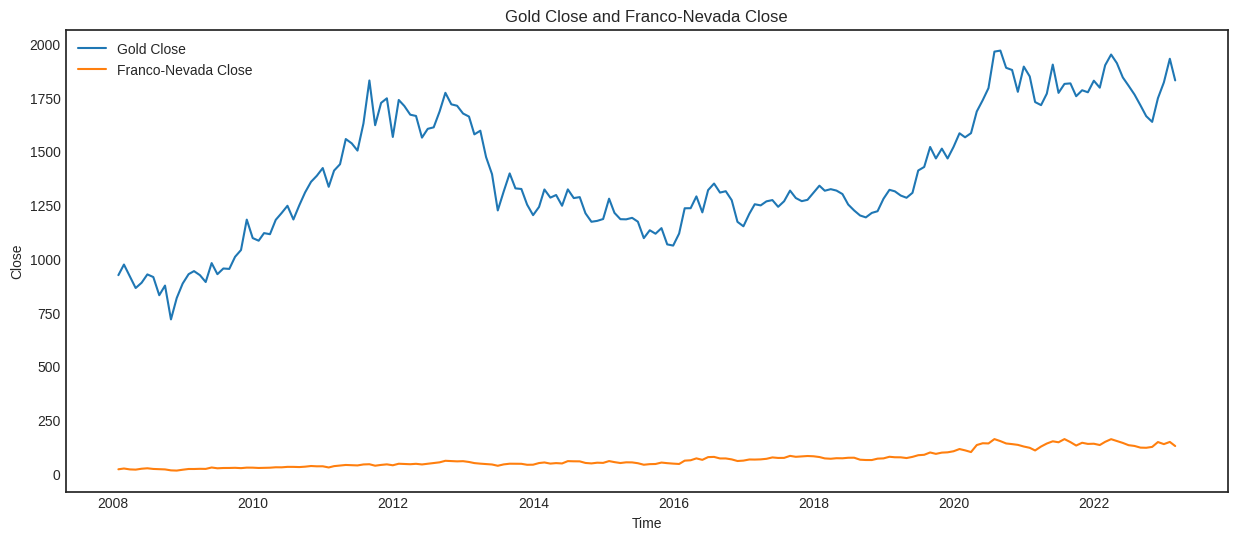

In [ ]:
# Plot the Data
#df.plot()
plt.figure(figsize = (15,6))
plt.plot((combo))
plt.title('Gold Close and Franco-Nevada Close')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend(['Gold Close','Franco-Nevada Close']);

In [ ]:
# Fit a VAR model to the data. Note: The value 2 is the order of the model
model = VAR(combo)
# The max order to test for is the value entered, e.g., p = 15 in this case
model.select_order(15)

# However, I prefer to also choose the metric criterion by which p is chosen, as seen below
results = model.fit(maxlags=15, ic='aic')
results.summary() # Based on the summary, it looks like p = 4 is the optimal choise -same as R's VAR_select :)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, May, 2023
Time:                     22:21:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.8923
Nobs:                     181.000    HQIC:                   11.8292
Log likelihood:          -1574.31    FPE:                    131431.
AIC:                      11.7862    Det(Omega_mle):         127180.
--------------------------------------------------------------------
Results for equation Close
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               62.123972        28.066720            2.213           0.027
L1.Close             0.945437         0.026365           35.859           0.000
L1.mineClose         0.272291         0.196652            1.385 

The VAR model chose a lag of 1 to best represent gold futures close prie and Franco-Nevada close price. When gold futures closing price is the dependent variable, a lag of 1 for gold close is statistically significant. When Franco-Nevada close price is the dependent variable, a lag of 1 for Franco-Nevada close is statistically significant.

# (l) Compute, plot, and interpret the respective impulse response functions.

TypeError: ignored

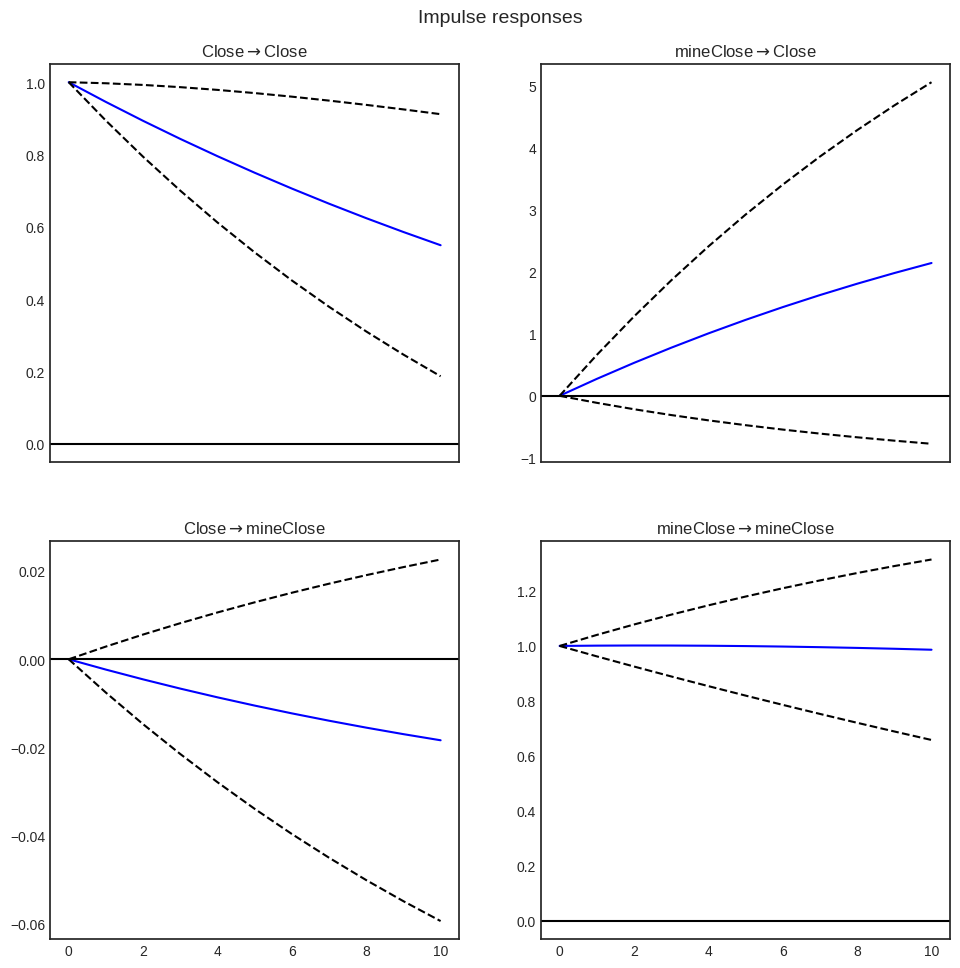

In [ ]:
# IRFs
irf = results.irf(10)
irf.plot(orth=False)[1] # Plots all of them

When gold close price affects gold close price (Close -> Close), there is a slow decay over time. Franco-Nevada close price shocks gold close price (mineClose -> Close) shows the gold close price to gradually increase over time. When gold close price shocks Franco-Nevada close price (Close -> mineClose), Franco-Nevada close price decreases slowly over time and begins to flatten out. When Franco-Nevada close price shocks Franco-Nevada close price (mineClose -> mineClose), nothing happens.

# (m) Perform a Granger-Causality test on your variables and discuss your results from the test.

In [ ]:
results.test_causality('Close','mineClose', kind='f').summary()

Test statistic,Critical value,p-value,df
1.917,3.868,0.167,"(1, 356)"


In [ ]:
results.test_causality('mineClose','Close', kind='f').summary()

Test statistic,Critical value,p-value,df
0.7710,3.868,0.381,"(1, 356)"


Neither of the Granger-Causily tests are statistically significant at the 5% level. This means that gold close price has no effect on Franco-Nevada close price, as well as Franco-Nevada close price has no effect on gold close price when it comes to predicting their future values.

# (n) Use your VAR model to forecast 12-steps ahead. Your forecast should include the respective error bands. Comment on the differences between the VAR forecast and the other ones obtained using the different methods.

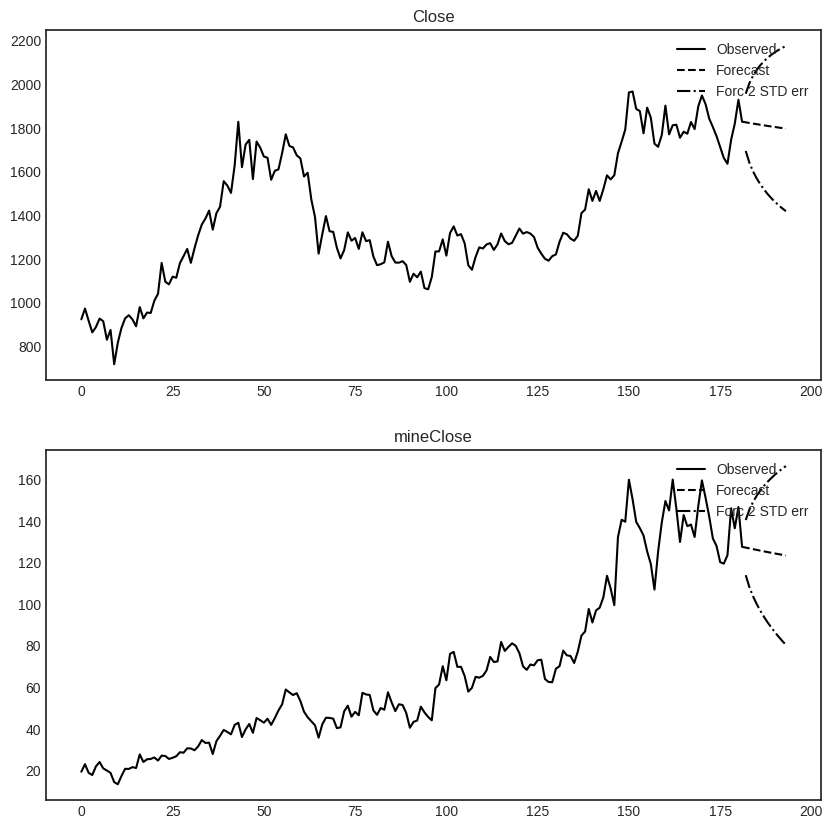

In [ ]:
# For h-steps ahead, just enter the number of steps, e.g., here we set h = 10
results.plot_forecast(12);

The VAR model predicts both the Franco-Nevada close price and the gold futures close price to be decreasing for 12-steps ahead or 12 months ahead. This forecast is very different from the other models. All the other models forecasted gold futures price or Franco-Nevada close price to increase or remain relatively the same. The Granger-Causality test showed that neither asset helps in predicting the other, so maybe that is why the VAR is forecasting something different from all the other models.

# (o) Lastly, plot the FEVD and discuss the results.

FEVD for Close
        Close  mineClose
0    1.000000   0.000000
1    0.999757   0.000243
2    0.999194   0.000806
3    0.998318   0.001682
4    0.997133   0.002867

FEVD for mineClose
        Close  mineClose
0    0.381121   0.618879
1    0.372318   0.627682
2    0.363811   0.636189
3    0.355592   0.644408
4    0.347655   0.652345




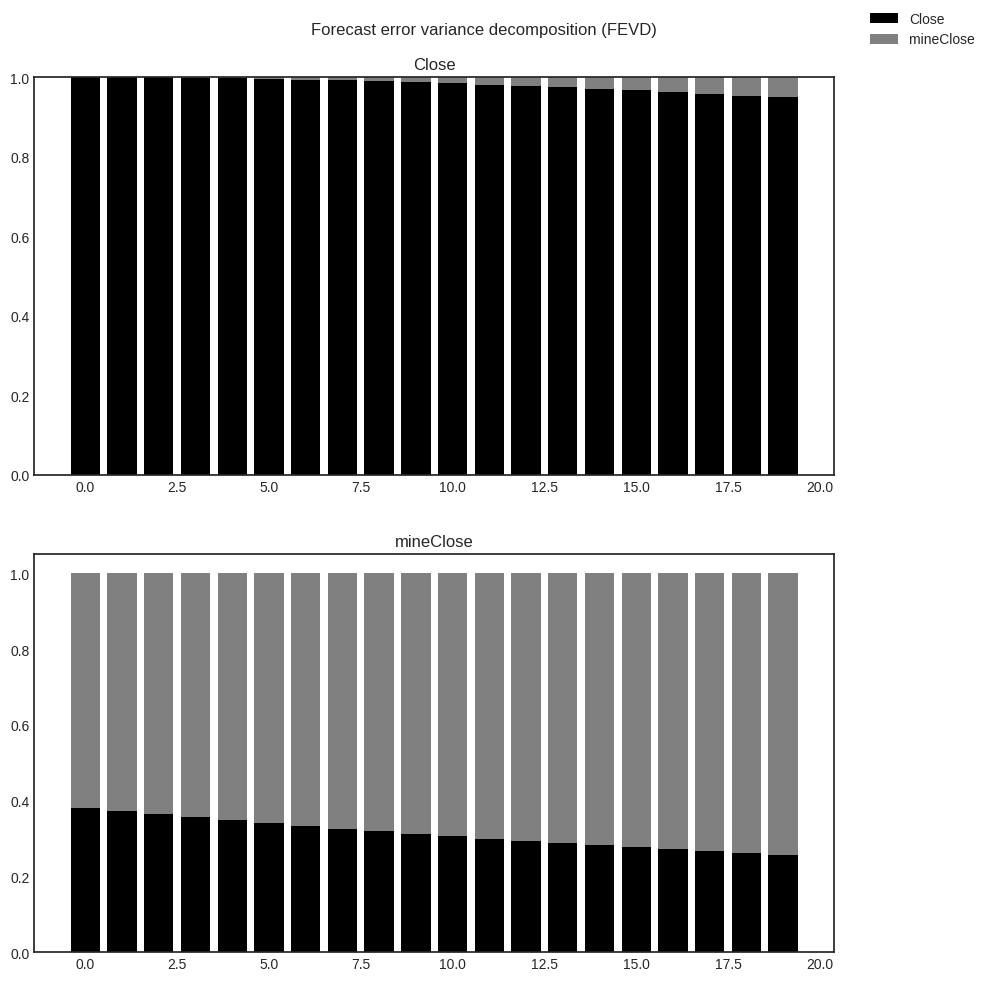

In [ ]:
fevd = results.fevd(5)
fevd.summary()
results.fevd(20).plot();

Gold futures price (Close) has much higher black bars than Franco-Nevada close price (mineClose). This means gold's close price contributes more to the forecast error variance. The earlier steps ahead have higher black bars than the later ones meaning the error forecast error bariance is explained more by earlier steps. Overall, gold close price contributes more to the forecast error variance than Franco-Nevada close price.

## Conclusion

According to the results of the Granger test, it was determined that gold is not a significant predictor of Franco-Nevada Corporation's stock prices.  Franco-Nevada Corporation's stock prices do not help predict the movement of gold prices either. In terms of forecasting accuracy, the ETS model outperformed other models for both gold prices and Franco-Nevada Corporation's stock prices, as it exhibited the lowest AIC (Akaike Information Criterion) value.

In future research, it is planned to explore the predictability of other mining companies using gold as a predictor. This implies investigating whether the prices of other mining companies can be accurately forecasted by considering the fluctuations in gold prices.

## Data Sources

We obtained the data using the Python package yfinance. Specifically, we imported the time series data for the closing price of gold (GC=F) and Franco-Nevada (FNV) stock closing prices. The original data consisted of daily observations starting from 01/01/2018. However, we resampled the data to obtain monthly data points.